In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [157]:
#Describe Dataset here
filename = 'data\zillow\MortgageRateConventionalFixed.csv'
mortgage_rates_src = pd.read_csv(filename)

#Describe Dataset here
filename = 'data\zillow\Affordability_Wide_2019Q2_Public.csv'
affordability_index_src = pd.read_csv(filename,encoding='latin-1')

#Describe Dataset here
filename = 'data\zillow\Affordability_Income_2018Q4.csv'
affordability_income_src = pd.read_csv(filename,encoding='latin-1')

#Median Rental Price - Single Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Sfr.csv'
median_rental_price_sfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Single Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Sfr.csv'
median_rental_price_sft_sqft_src = pd.read_csv(filename)

#Median Rental Price - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Mfr5Plus.csv'
median_rental_price_mfr_src = pd.read_csv(filename)

#Median Rental Price Per Square Foot - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Mfr5Plus.csv'
median_rental_price_mfr_sqft_src = pd.read_csv(filename)

#Rental Index Per Square Foot - All Homes
filename = 'data\zillow\City_ZriPerSqft_AllHomes.csv'
rental_index_all_sqft_src = pd.read_csv(filename,encoding='latin-1')


In [158]:
mortgage_rates_src.describe()

,MortgageRateConventionalFixed
count,91680.000000
mean,3.953478
std,0.358861
min,3.230000
25%,3.690000
50%,3.900000
75%,4.200000
max,5.000000


In [159]:
mortgage_rates_monthly = mortgage_rates_src
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='TimePeriod')
mortgage_rates_monthly = mortgage_rates_monthly.rename(columns={'MortgageRateConventionalFixed':'Rate'})
mortgage_rates_monthly['Date'] = pd.to_datetime(mortgage_rates_monthly['Date'], format='%Y-%m-%d')
mortgage_rates_monthly['Year'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).year
mortgage_rates_monthly['Month'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).month
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='Date')
mortgage_rates_monthly = mortgage_rates_monthly[['Year','Month','Rate']]
mortgage_rates_monthly = mortgage_rates_monthly.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+
mortgage_rates_monthly.head()

Rate
Year Month      
2011 6      4.36
     7      4.45
     8      4.12
     9      3.97
     10     4.06

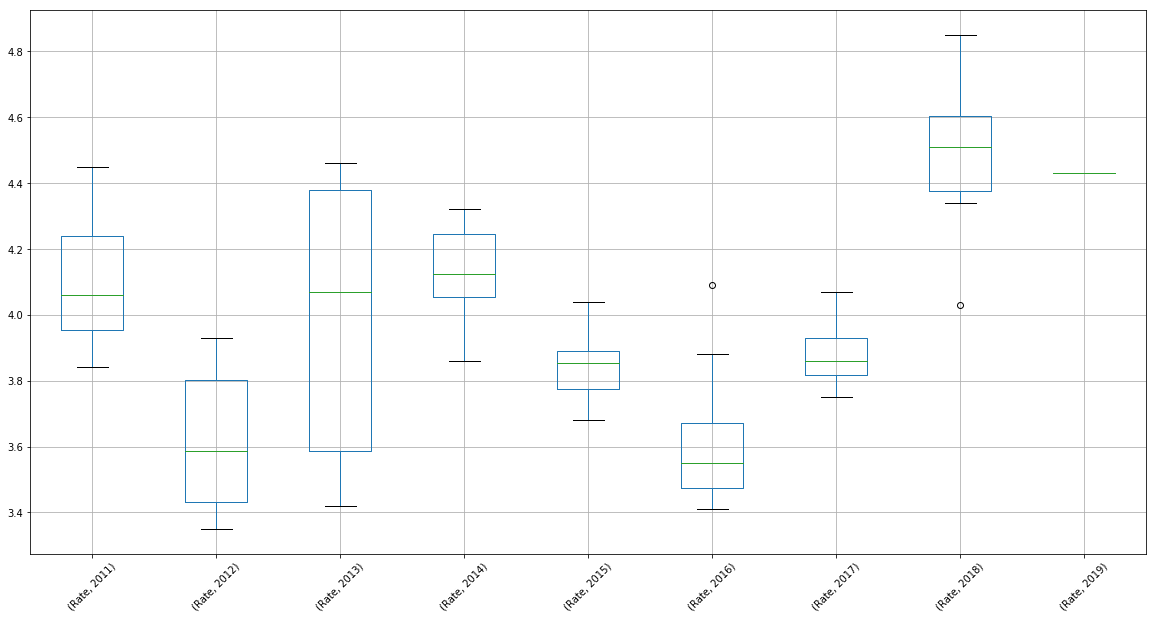

Rate                                                
Year  2011  2012  2013  2014  2015  2016  2017  2018  2019
Month                                                     
1      NaN  3.81  3.46  4.32  3.70  3.74  4.04  4.03  4.43
2      NaN  3.80  3.58  4.24  3.79  3.59  4.02  4.34   NaN
3      NaN  3.93  3.59  4.29  3.79  3.65  4.07  4.36   NaN
4      NaN  3.84  3.42  4.26  3.68  3.54  3.90  4.38   NaN
5      NaN  3.73  3.59  4.13  3.86  3.56  3.89  4.52   NaN

In [160]:
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.unstack(level=0).plot.box(rot=45, grid=True, figsize=(20,10))
plt.show()
mortgage_rates_monthly.unstack(level=0).head()

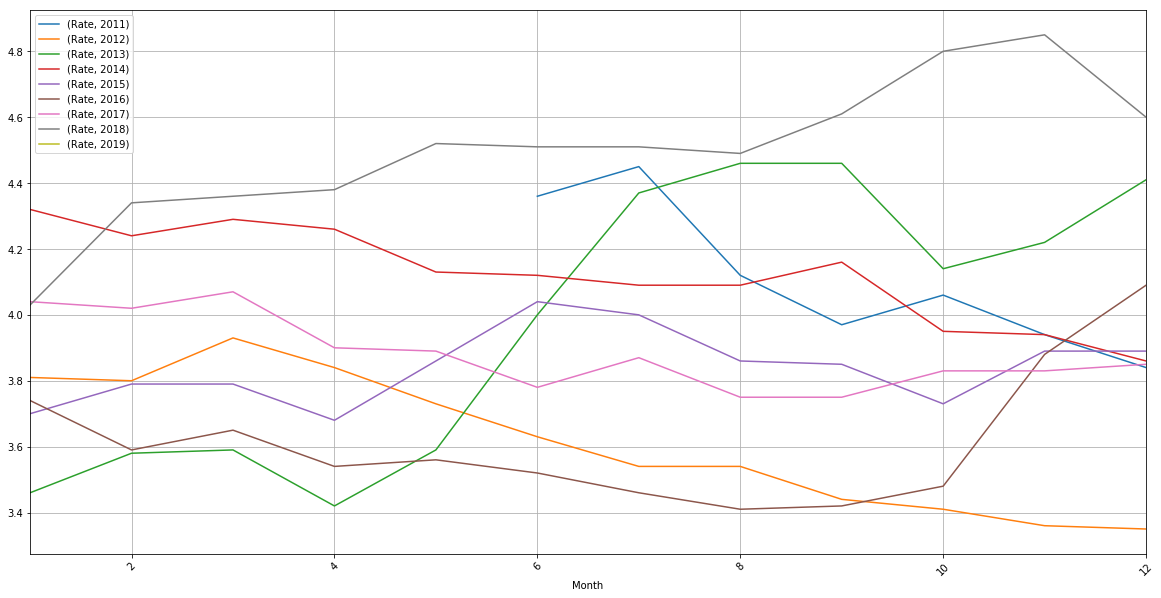

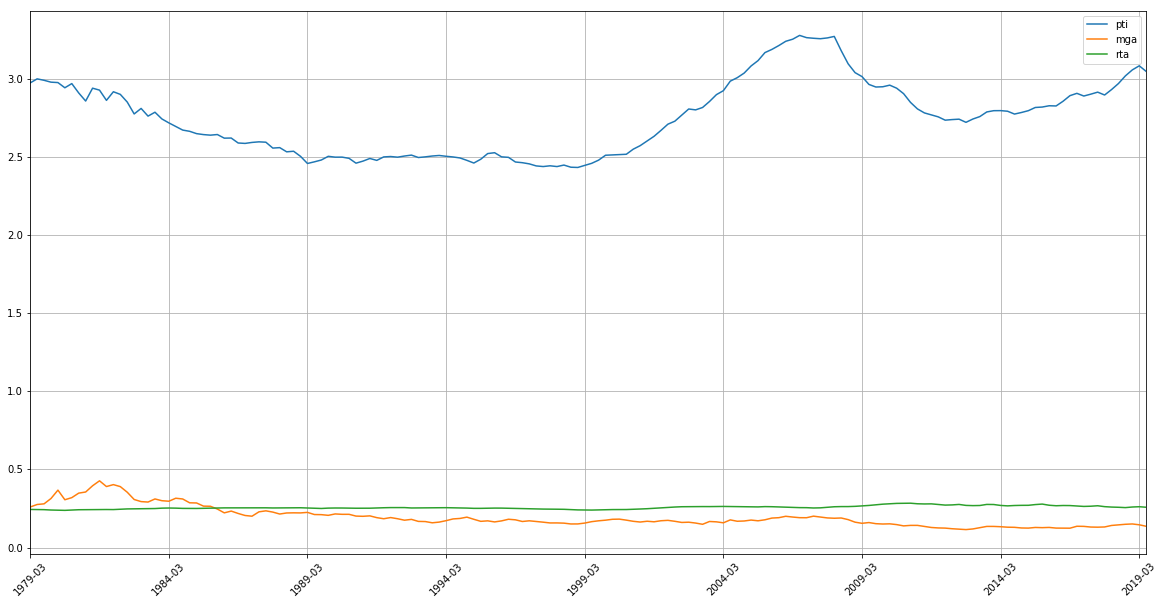

,RegionName,Index,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,...,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,State,City
0,United States,Price To Income,2.903590,2.939427,2.942101,2.946123,2.934565,2.930422,2.964477,2.917089,...,3.371671,3.383362,3.433804,3.473954,3.515177,3.568544,3.583441,3.562165,,United States
1,"New York, NY",Price To Income,2.928344,2.956635,2.966927,2.961860,3.007144,2.996565,3.060809,2.980520,...,5.405203,5.418615,5.467140,5.484124,5.495752,5.540017,5.559801,5.505950,NY,New York
2,"Los Angeles-Long Beach-Anaheim, CA",Price To Income,4.019673,4.141217,4.208146,4.278269,4.308551,4.384455,4.429802,4.435118,...,8.705759,8.797724,8.917271,8.912011,8.909573,8.929002,8.839738,8.744949,CA,Los Angeles-Long Beach-Anaheim
3,"Chicago, IL",Price To Income,3.035758,3.045651,2.984501,2.973171,2.895068,2.912028,2.774334,2.794168,...,3.074042,3.091003,3.128954,3.132292,3.129938,3.145848,3.155977,3.113370,IL,Chicago
4,"Dallas-Fort Worth, TX",Price To Income,3.887457,4.025835,4.101038,4.130605,4.135414,4.082676,4.122516,4.133618,...,3.110652,3.152714,3.262052,3.318315,3.358206,3.437634,3.475066,3.430203,TX,Dallas-Fort Worth


In [161]:
#Let's thorw up a quick plot to see change over time by Size / period
mortgage_rates_monthly.unstack(level=0).plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')


plt.show()

affordability_index = affordability_index_src#.set_index('Index',append=True)
#affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
#affordability_index['Date'] = pd.to_datetime(affordability_index['Date'], format='%Y-%m')
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns=['RegionID','SizeRank','HistoricAverage_1985thru1999'])
#affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])

affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta', figsize=(20,10))
#mortgage_rates_monthly.median().plot(rot=45, grid=True, label='mrt')
plt.legend(loc='best')
plt.show()

affordability_index.head()

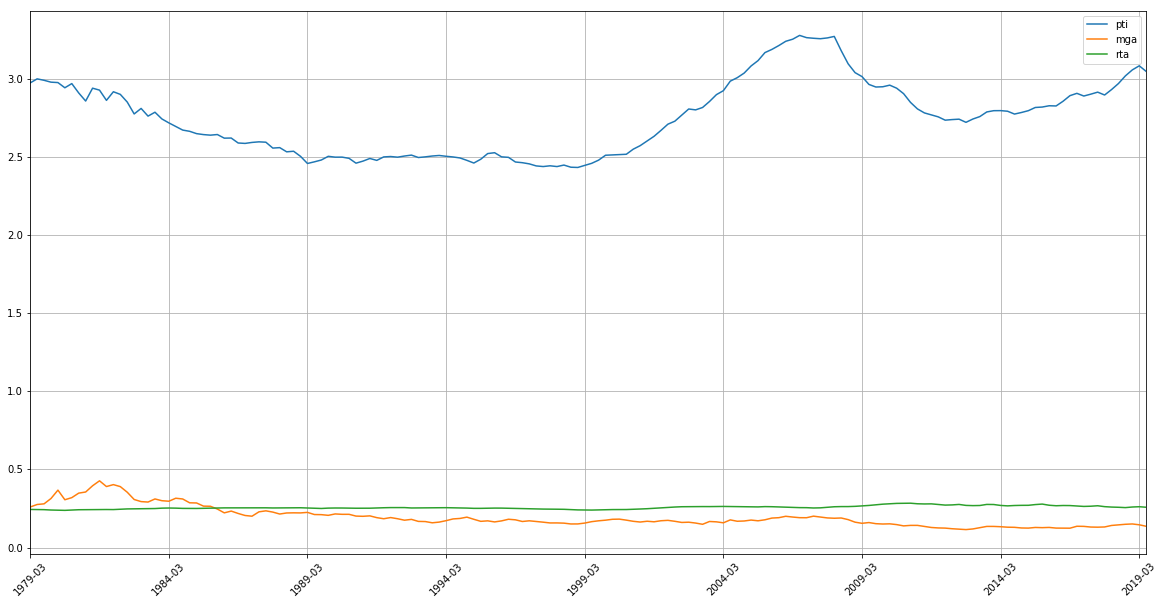

,Index,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,...,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,State,City
0,Price To Income,2.903590,2.939427,2.942101,2.946123,2.934565,2.930422,2.964477,2.917089,2.868660,...,3.371671,3.383362,3.433804,3.473954,3.515177,3.568544,3.583441,3.562165,,United States
1,Price To Income,2.928344,2.956635,2.966927,2.961860,3.007144,2.996565,3.060809,2.980520,3.018619,...,5.405203,5.418615,5.467140,5.484124,5.495752,5.540017,5.559801,5.505950,NY,New York
2,Price To Income,4.019673,4.141217,4.208146,4.278269,4.308551,4.384455,4.429802,4.435118,4.441902,...,8.705759,8.797724,8.917271,8.912011,8.909573,8.929002,8.839738,8.744949,CA,Los Angeles-Long Beach-Anaheim
3,Price To Income,3.035758,3.045651,2.984501,2.973171,2.895068,2.912028,2.774334,2.794168,2.870144,...,3.074042,3.091003,3.128954,3.132292,3.129938,3.145848,3.155977,3.113370,IL,Chicago
4,Price To Income,3.887457,4.025835,4.101038,4.130605,4.135414,4.082676,4.122516,4.133618,4.148369,...,3.110652,3.152714,3.262052,3.318315,3.358206,3.437634,3.475066,3.430203,TX,Dallas-Fort Worth


In [162]:
affordability_index = affordability_index_src#.set_index('Index',append=True)
#affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
#affordability_index['Date'] = pd.to_datetime(affordability_index['Date'], format='%Y-%m')
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns=['RegionName','RegionID','SizeRank','HistoricAverage_1985thru1999'])

affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta', figsize=(20,10))
#mortgage_rates_monthly.median().plot(rot=45, grid=True, label='mrt')
plt.legend(loc='best')
plt.show()

affordability_index.head()

In [273]:
affordability_index = affordability_index_src#.set_index('Index',append=True)
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns=['RegionID','RegionName','SizeRank','HistoricAverage_1985thru1999'])
affordability_index_us = affordability_index.query('City == "United States"')
affordability_index = affordability_index[~affordability_index['City'].str.contains("United States")]
affordability_index.set_index(['Index','State','City'],inplace=True)
affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
#affordability_index.reset_index(['State','City'], inplace=True, drop=True)

'''
affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta', figsize=(20,10))
#mortgage_rates_monthly.median().plot(rot=45, grid=True, label='mrt')
plt.legend(loc='best')
plt.show()


#affordability_index['Index'] = affordability_index['Index']
#affordability_index.reset_index([['Index']])

affordability_index.stack(level=1).query("Index == 'Price To Income'").median().plot.box(rot=45, grid=True, figsize=(20,10))
affordability_index.stack(level=1).query("Index == 'Mortgage Affordability'").median().plot.box(rot=45, grid=True, figsize=(20,10))
affordability_index.stack(level=1).query("Index == 'Rent Affordability'").median().plot.box(rot=45, grid=True, figsize=(20,10))
#affordability_index
#affordability_index.stack(level=1).query("Index == 'Rent Affordability'")
plt.show()
'''
affordability_index.stack(level=1).head()

Year                                                            1979  \
Index           State City                           Month             
Price To Income  NY   New York                       03     2.928344   
                                                     06     2.956635   
                                                     09     2.966927   
                                                     12     2.961860   
                 CA   Los Angeles-Long Beach-Anaheim 03     4.019673   

Year                                                            1980  \
Index           State City                           Month             
Price To Income  NY   New York                       03     3.007144   
                                                     06     2.996565   
                                                     09     3.060809   
                                                     12     2.980520   
                 CA   Los Angeles-Long Beach-Anaheim 03     4.308551   

Year                                                            1981  \
Index           State City                           Month             
Price To Income  NY   New York                       03     3.018619   
                                                     06     3.067168   
                                                     09     3.132619   
                                                     12     3.015192   
                 CA   Los Angeles-Long Beach-Anaheim 03     4.441902   

Year                                                            1982  \
Index           State City                           Month             
Price To Income  NY   New York                       03     2.917857   
                                                     06     3.008836   
                                                     09     2.954296   
                                                     12     2.975676   
                 CA   Los Angeles-Long Beach-Anaheim 03     4.380838   

Year                                                            1983  \
Index           State City                           Month             
Price To Income  NY   New York                       03     2.995379   
                                                     06     3.025008   
                                                     09     3.104487   
                                                     12     3.154338   
                 CA   Los Angeles-Long Beach-Anaheim 03     4.254442   

Year                                                            1984  \
Index           State City                           Month             
Price To Income  NY   New York                       03     3.201271   
                                                     06     3.302911   
                                                     09     3.376619   
                                                     12     3.415441   
                 CA   Los Angeles-Long Beach-Anaheim 03     4.047637   

Year                                                            1985  \
Index           State City                           Month             
Price To Income  NY   New York                       03     3.491193   
                                                     06     3.590996   
                                                     09     3.719339   
                                                     12     3.820396   
                 CA   Los Angeles-Long Beach-Anaheim 03     3.870192   

Year                                                            1986  \
Index           State City                           Month             
Price To Income  NY   New York                       03     3.938005   
                                                     06     4.095209   
                                                     09     4.238577   
                                                     12     4.375609   
                 CA   Los Angeles

In [277]:
affordability_income = affordability_income_src
affordability_income['State'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_income['City'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_income = affordability_income.drop(columns=['RegionName','RegionID','SizeRank'])
affordability_income_us = affordability_income.query('City == "United States"')
affordability_income = affordability_income[~affordability_income['City'].str.contains("United States")]
affordability_income.set_index(['State','City'],inplace=True)
affordability_income.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_income.columns],names=['Year','Month'])

#affordability_income = pd.DataFrame(affordability_income.stack())
#affordability_income.head()

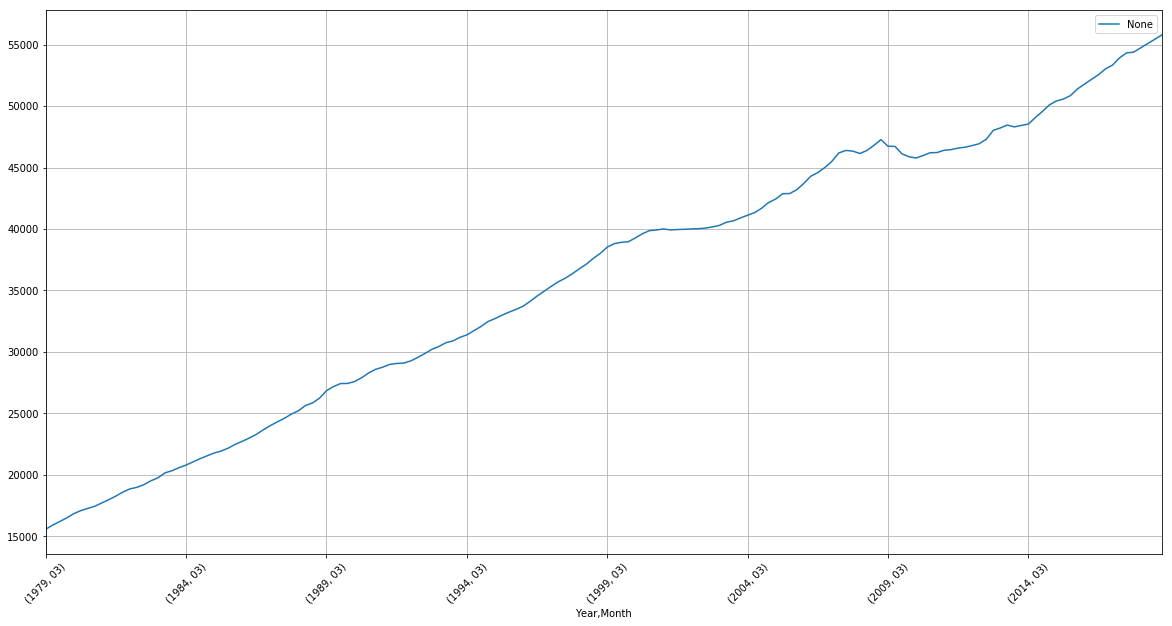

Year                                      1979                                \
Month                                       03        06        09        12   
State City                                                                     
 NY   New York                        17536.34  17888.75  18255.17  18614.93   
 CA   Los Angeles-Long Beach-Anaheim  17913.83  18285.02  18746.27  19213.79   
 IL   Chicago                         20056.35  20460.12  20910.06  21267.37   
 TX   Dallas-Fort Worth               18147.33  18458.77  18899.16  19454.80   
 PA   Philadelphia                    17530.66  17869.90  18248.18  18589.76   

Year                                      1980                                \
Month                                       03        06        09        12   
State City                                                                     
 NY   New York                        19075.72  19493.98  19894.97  20320.32   
 CA   Los Angeles-Long Beach-Anaheim  19782.36  20306.08  20737.44  21091.91   
 IL   Chicago                         21678.20  21848.90  21984.03  22067.13   
 TX   Dallas-Fort Worth               20069.21  20608.07  21021.31  21363.17   
 PA   Philadelphia                    19067.80  19428.49  19742.03  20054.82   

Year                                      1981            ...      2016  \
Month                                       03        06  ...        09   
State City                                                ...             
 NY   New York                        20744.95  21122.72  ...  72364.87   
 CA   Los Angeles-Long Beach-Anaheim  21468.44  21765.04  ...  66466.82   
 IL   Chicago                         22395.99  22598.73  ...  65979.46   
 TX   Dallas-Fort Worth               21890.50  22279.25  ...  64606.25   
 PA   Philadelphia                    20449.59  20759.86  ...  66785.55   

Year                                                2017                      \
Month                                       12        03        06        09   
State City                                                                     
 NY   New York                        72812.68  73819.12  74936.31  75963.84   
 CA   Los Angeles-Long Beach-Anaheim  67400.60  68525.74  69658.59  70516.54   
 IL   Chicago                         66579.67  67326.11  68089.22  68769.39   
 TX   Dallas-Fort Worth               65180.46  66119.78  66969.37  67831.43   
 PA   Philadelphia                    67220.34  67832.33  68361.58  68876.61   

Year                                                    2018                \
Month                                       12            03            06   
State City                                                                   
 NY   New York                        76753.93  77408.082812  78062.235625   
 CA   Los Angeles-Long Beach-Anaheim  71268.43  71844.905261  72421.380523   
 IL   Chicago                         69427.31  69940.585833  70453.861665   
 TX   Dallas-Fort Worth               68607.56  69045.650070  69483.740139   
 PA   Philadelphia                    69216.88  69806.796591  70396.713182   

Year                                                              
Month                                           09            12  
State City                                                        
 NY   New York                        78716.388438  79370.541250  
 CA   Los Angeles-Long Beach-Anaheim  72997.855784  73574.331046  
 IL   Chicago                         70967.137498  71480.413331  
 TX   Dallas-Fort Worth               69921.830209  70359.920279  
 PA   Philadelphia                    70986.629773  71576.546364  

[5 rows x 160 columns]

In [278]:
affordability_income.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()
affordability_income.head()

In [282]:
median_rental_price_sfr = median_rental_price_sfr_src
median_rental_price_sfr['State'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_sfr['City'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_sfr = median_rental_price_sfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_sfr_us = median_rental_price_sfr.query('City == "United States"')
#median_rental_price_sfr = median_rental_price_sfr[~affordability_income['City'].str.contains("United States")]
median_rental_price_sfr.set_index(['State','City'], inplace=True)
median_rental_price_sfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr.columns],names=['Year','Month'])

#median_rental_price_sfr.head()

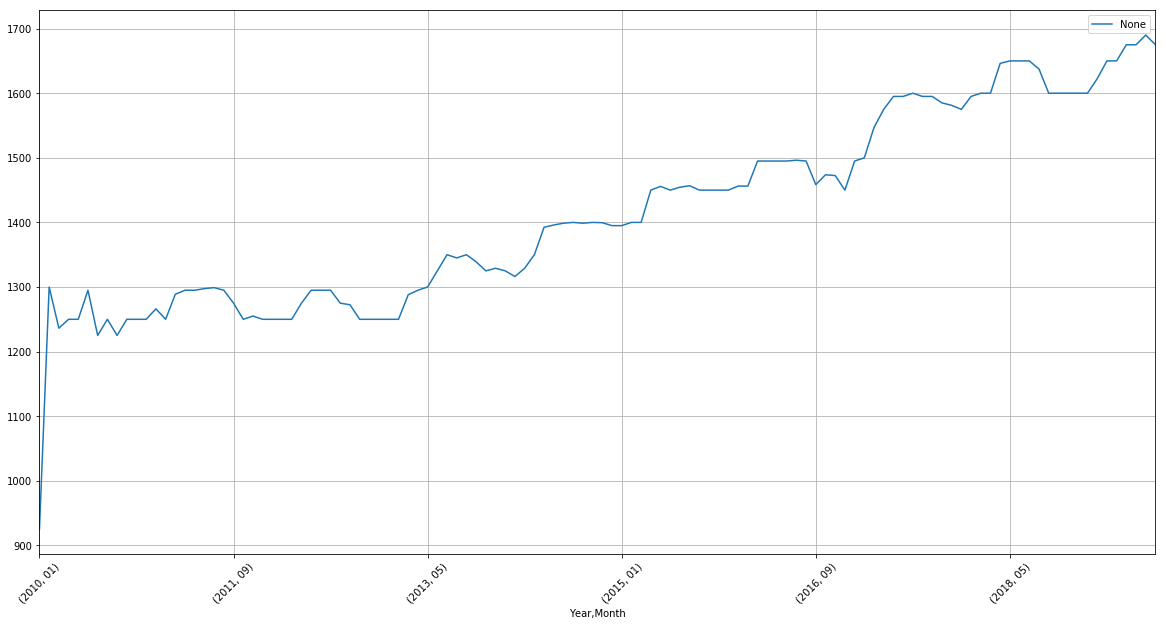

Year              2010                                                      \
Month               01  02      03      04      05      06      07      08   
State City                                                                   
      New York     NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
      Los Angeles  NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
      Houston      NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   
      Chicago      NaN NaN  1542.5  1500.0  1500.0  1600.0  1600.0  1500.0   
      San Antonio  NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Year                               ...    2018            2019          \
Month                  09      10  ...      11      12      01      02   
State City                         ...                                   
      New York        NaN     NaN  ...  2500.0  2500.0  2500.0  2500.0   
      Los Angeles     NaN     NaN  ...  3995.0  3995.0  3949.0  3950.0   
      Houston         NaN     NaN  ...  1550.0  1550.0  1550.0  1550.0   
      Chicago      1650.0  1700.0  ...  1565.0  1550.0  1550.0  1595.0   
      San Antonio     NaN     NaN  ...  1295.0  1295.0  1300.0  1295.0   

Year                                                               
Month                  03      04      05      06      07      08  
State City                                                         
      New York     2500.0  2500.0  2550.0  2500.0  2500.0  2600.0  
      Los Angeles  3875.0  3950.0  3995.0  3990.0  3900.0  4000.0  
      Houston      1550.0  1595.0  1600.0  1600.0  1600.0  1600.0  
      Chicago      1600.0  1600.0  1600.0  1605.0  1650.0  1600.0  
      San Antonio  1300.0  1300.0  1332.5  1350.0  1350.0  1339.0  

[5 rows x 116 columns]

In [283]:
median_rental_price_sfr.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()
median_rental_price_sfr.head()

In [90]:
median_rental_price_sft_sqft_src

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,2.519328,2.462653,2.399000,2.488433,2.510986,2.553778,2.594242,2.583333,2.500000,2.550000
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,1.676921,1.728179,1.725829,...,2.642857,2.624553,2.626128,2.673983,2.651515,2.690100,2.736318,2.771493,2.750924,2.760252
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,0.935094,0.938375,0.938967,0.941667,0.949367,0.961538,0.975014,0.978820,0.974817,0.972868
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,NaN,...,1.619433,1.636364,1.659387,1.814709,1.842634,1.795039,1.771255,1.785714,1.790000,1.782609
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,0.853724,0.855915,0.862069,0.869247,0.877371,0.887311,0.886067,0.887507,0.888823,0.885246
5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,6,NaN,NaN,0.833333,0.868784,0.882857,...,1.145833,1.152235,1.156069,1.169591,1.201037,1.229123,1.231847,1.236264,1.230194,1.201763
6,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7,NaN,0.759259,0.757558,0.753415,0.760672,...,0.918746,0.912067,0.928678,0.939027,0.964978,0.975496,0.992729,0.990854,0.984157,0.988257
7,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,8,NaN,0.824998,0.792298,0.773861,0.773105,...,0.874060,0.878463,0.886589,0.882803,0.899281,0.907496,0.922131,0.930004,0.935683,0.935745
8,San Diego,CA,San Diego-Carlsbad,San Diego County,9,NaN,NaN,NaN,NaN,NaN,...,2.095512,2.141071,2.187500,2.242991,2.286150,2.296470,2.263225,2.239799,2.246790,2.208155
9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,10,NaN,NaN,NaN,NaN,NaN,...,1.190476,1.189138,1.202778,1.212322,1.241257,1.282051,1.275398,1.264822,1.302174,1.293103


In [111]:
median_rental_price_sft_sqft = median_rental_price_sft_sqft_src
#median_rental_price_sft_sqft['State'] = median_rental_price_sft_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_sft_sqft['City'] = median_rental_price_sft_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_sft_sqft = median_rental_price_sft_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
median_rental_price_sft_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sft_sqft.columns],names=['Year','Month'])

#median_rental_price_sft_sqft.set_index(['State','City'], inplace=True)
#median_rental_price_sft_sqft.head()

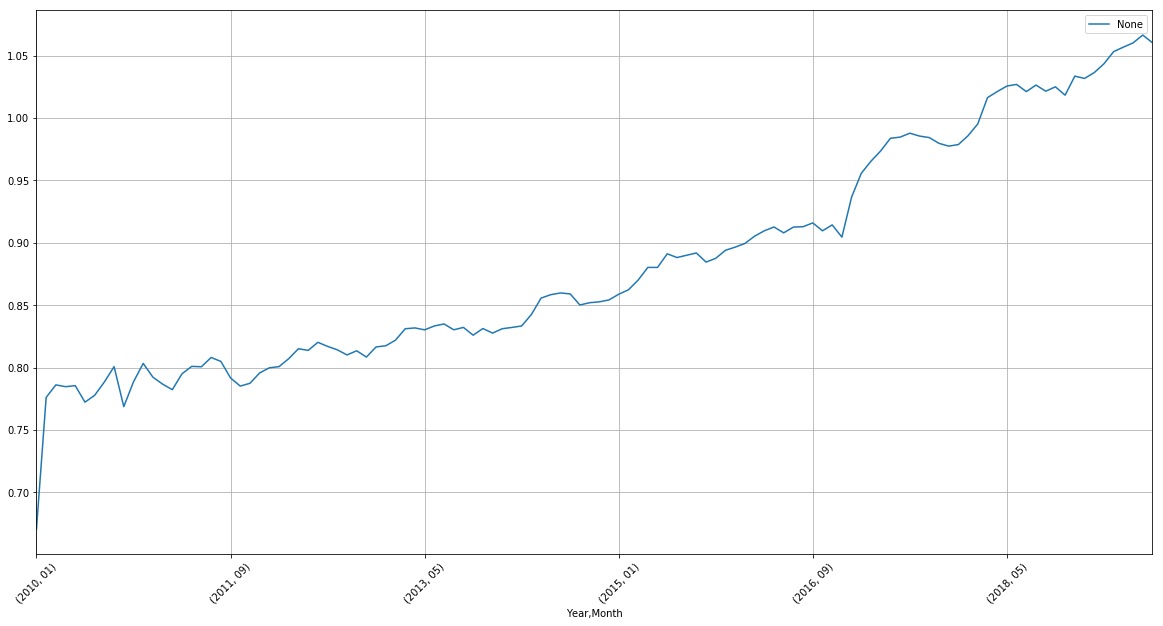

Year  State 2010                                                        \
Month   NaN   01  02        03        04        05        06        07   
0        NY  NaN NaN       NaN       NaN       NaN       NaN       NaN   
1        CA  NaN NaN  1.676921  1.728179  1.725829  1.707474  1.737567   
2        TX  NaN NaN       NaN       NaN       NaN       NaN       NaN   
3        IL  NaN NaN       NaN       NaN       NaN       NaN       NaN   
4        TX  NaN NaN       NaN       NaN       NaN       NaN       NaN   

Year                       ...      2018      2019                      \
Month        08        09  ...        12        01        02        03   
0           NaN       NaN  ...  2.462653  2.399000  2.488433  2.510986   
1      1.818182  1.767982  ...  2.624553  2.626128  2.673983  2.651515   
2           NaN       NaN  ...  0.938375  0.938967  0.941667  0.949367   
3           NaN       NaN  ...  1.636364  1.659387  1.814709  1.842634   
4           NaN       NaN  ...  0.855915  0.862069  0.869247  0.877371   

Year                                                            City  
Month        04        05        06        07        08          NaN  
0      2.553778  2.594242  2.583333  2.500000  2.550000     New York  
1      2.690100  2.736318  2.771493  2.750924  2.760252  Los Angeles  
2      0.961538  0.975014  0.978820  0.974817  0.972868      Houston  
3      1.795039  1.771255  1.785714  1.790000  1.782609      Chicago  
4      0.887311  0.886067  0.887507  0.888823  0.885246  San Antonio  

[5 rows x 118 columns]

In [112]:
median_rental_price_sft_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()
median_rental_price_sft_sqft.head()

In [113]:
median_rental_price_mfr = median_rental_price_mfr_src
#median_rental_price_mfr['State'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_mfr['City'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_mfr = median_rental_price_mfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
median_rental_price_mfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr.columns],names=['Year','Month'])

median_rental_price_mfr.head()

Year  State    2010                                                          \
Month   NaN      01      02      03      04      05      06      07      08   
0        NY     NaN  2200.0  2397.5  2500.0  2450.0  2595.0  2500.0  2395.0   
1        CA     NaN  1762.5  1750.0  1945.0  2000.0  2100.0  2100.0  2200.0   
2        TX     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3        IL  1645.0  1350.0  1315.0  1325.0  1307.5  1350.0  1300.0  1295.0   
4        TX     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Year           ...    2018    2019                                          \
Month      09  ...      12      01      02      03      04      05      06   
0      2550.0  ...  2475.0  2475.0  2499.0  2500.0  2575.0  2600.0  2650.0   
1      1950.0  ...  2550.0  2565.0  2550.0  2550.0  2595.0  2561.0  2585.0   
2         NaN  ...  1385.0  1367.0  1372.0  1385.0  1380.0  1375.0  1379.0   
3      1395.0  ...  1700.0  1745.0  1750.0  1795.0  1795.0  1795.0  1795.0   
4       910.5  ...  1141.0  1166.0  1177.0  1175.0  1179.0  1198.0  1210.0   

Year                          City  
Month      07      08          NaN  
0      2650.0  2650.0     New York  
1      2580.0  2595.0  Los Angeles  
2      1369.0  1368.0      Houston  
3      1750.0  1725.0      Chicago  
4      1203.0  1186.0  San Antonio  

[5 rows x 118 columns]

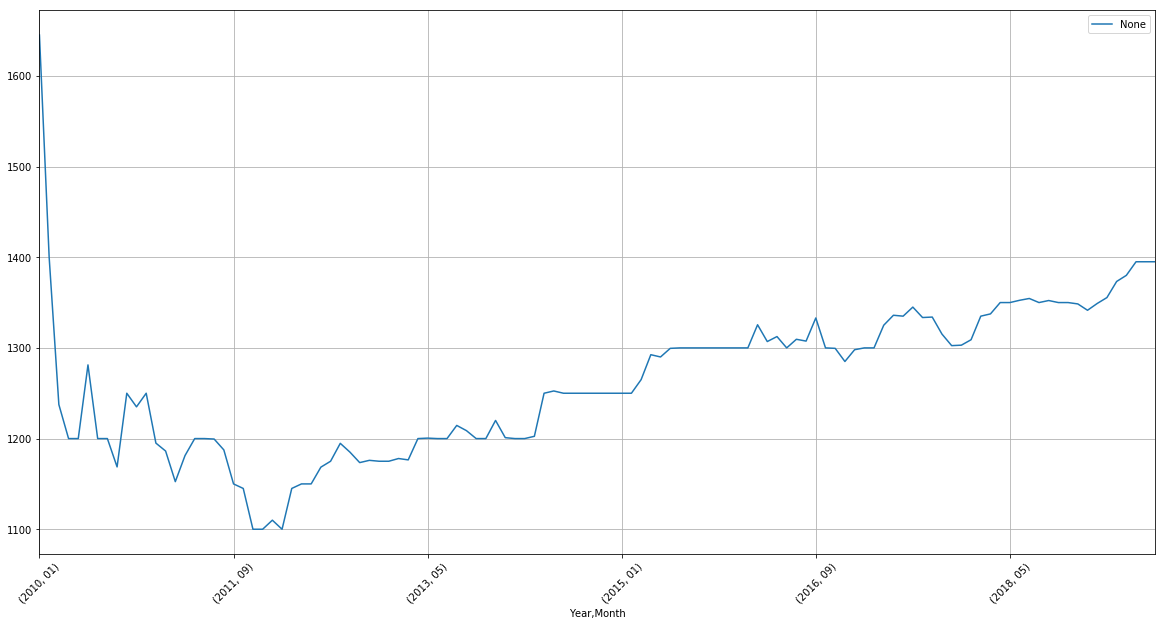

Year  State    2010                                                          \
Month   NaN      01      02      03      04      05      06      07      08   
0        NY     NaN  2200.0  2397.5  2500.0  2450.0  2595.0  2500.0  2395.0   
1        CA     NaN  1762.5  1750.0  1945.0  2000.0  2100.0  2100.0  2200.0   
2        TX     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3        IL  1645.0  1350.0  1315.0  1325.0  1307.5  1350.0  1300.0  1295.0   
4        TX     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Year           ...    2018    2019                                          \
Month      09  ...      12      01      02      03      04      05      06   
0      2550.0  ...  2475.0  2475.0  2499.0  2500.0  2575.0  2600.0  2650.0   
1      1950.0  ...  2550.0  2565.0  2550.0  2550.0  2595.0  2561.0  2585.0   
2         NaN  ...  1385.0  1367.0  1372.0  1385.0  1380.0  1375.0  1379.0   
3      1395.0  ...  1700.0  1745.0  1750.0  1795.0  1795.0  1795.0  1795.0   
4       910.5  ...  1141.0  1166.0  1177.0  1175.0  1179.0  1198.0  1210.0   

Year                          City  
Month      07      08          NaN  
0      2650.0  2650.0     New York  
1      2580.0  2595.0  Los Angeles  
2      1369.0  1368.0      Houston  
3      1750.0  1725.0      Chicago  
4      1203.0  1186.0  San Antonio  

[5 rows x 118 columns]

In [114]:
median_rental_price_mfr.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()
median_rental_price_mfr.head()

In [115]:
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft_src
#median_rental_price_mfr_sqft['State'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
median_rental_price_mfr_sqft['City'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
median_rental_price_mfr_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr_sqft.columns],names=['Year','Month'])

median_rental_price_mfr_sqft.head()

Year  State 2010                                                             \
Month   NaN   02        03        04        05        06       07        08   
0        NY  NaN       NaN       NaN       NaN       NaN      NaN       NaN   
1        CA  NaN  1.529126  1.650546  1.651665  1.646133  1.65729  1.722735   
2        TX  NaN       NaN       NaN       NaN       NaN      NaN       NaN   
3        IL  NaN  1.392857  1.470588  1.417424  1.500317  1.40000  1.405921   
4        TX  NaN       NaN       NaN       NaN       NaN      NaN       NaN   

Year                       ...      2018      2019                      \
Month        09        10  ...        12        01        02        03   
0           NaN       NaN  ...  3.055556  3.055556  3.080000  3.125000   
1      1.726789  1.730697  ...  3.149802  3.100000  3.094003  3.114658   
2           NaN       NaN  ...  1.533333  1.517682  1.516520  1.526667   
3      1.644133  1.693333  ...  2.162500  2.214286  2.316364  2.343157   
4      0.946632  0.916881  ...  1.278092  1.279703  1.321175  1.320106   

Year                                                            City  
Month        04        05        06        07        08          NaN  
0      3.312500  3.333333  3.466667  3.487982  3.375000     New York  
1      3.159391  3.146154  3.181818  3.179843  3.201931  Los Angeles  
2      1.520193  1.515152  1.526718  1.524743  1.523207      Houston  
3      2.268293  2.242857  2.262702  2.247407  2.250000      Chicago  
4      1.322815  1.338574  1.353028  1.352830  1.337331  San Antonio  

[5 rows x 117 columns]

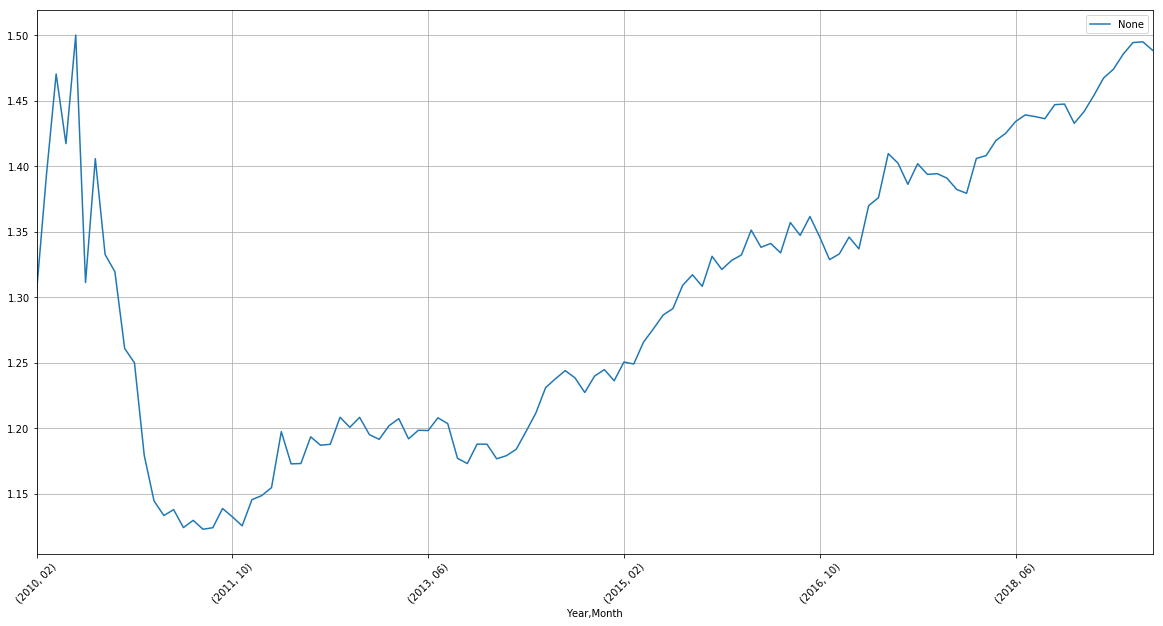

Year  State 2010                                                             \
Month   NaN   02        03        04        05        06       07        08   
0        NY  NaN       NaN       NaN       NaN       NaN      NaN       NaN   
1        CA  NaN  1.529126  1.650546  1.651665  1.646133  1.65729  1.722735   
2        TX  NaN       NaN       NaN       NaN       NaN      NaN       NaN   
3        IL  NaN  1.392857  1.470588  1.417424  1.500317  1.40000  1.405921   
4        TX  NaN       NaN       NaN       NaN       NaN      NaN       NaN   

Year                       ...      2018      2019                      \
Month        09        10  ...        12        01        02        03   
0           NaN       NaN  ...  3.055556  3.055556  3.080000  3.125000   
1      1.726789  1.730697  ...  3.149802  3.100000  3.094003  3.114658   
2           NaN       NaN  ...  1.533333  1.517682  1.516520  1.526667   
3      1.644133  1.693333  ...  2.162500  2.214286  2.316364  2.343157   
4      0.946632  0.916881  ...  1.278092  1.279703  1.321175  1.320106   

Year                                                            City  
Month        04        05        06        07        08          NaN  
0      3.312500  3.333333  3.466667  3.487982  3.375000     New York  
1      3.159391  3.146154  3.181818  3.179843  3.201931  Los Angeles  
2      1.520193  1.515152  1.526718  1.524743  1.523207      Houston  
3      2.268293  2.242857  2.262702  2.247407  2.250000      Chicago  
4      1.322815  1.338574  1.353028  1.352830  1.337331  San Antonio  

[5 rows x 117 columns]

In [116]:
median_rental_price_mfr_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()
median_rental_price_mfr_sqft.head()

In [117]:
rental_index_all_sqft = rental_index_all_sqft_src
#rental_index_all_sqft['State'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
rental_index_all_sqft['City'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
rental_index_all_sqft = rental_index_all_sqft.drop(columns=['RegionID','RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
rental_index_all_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in rental_index_all_sqft.columns],names=['Year','Month'])

#rental_index_all_sqft.head()

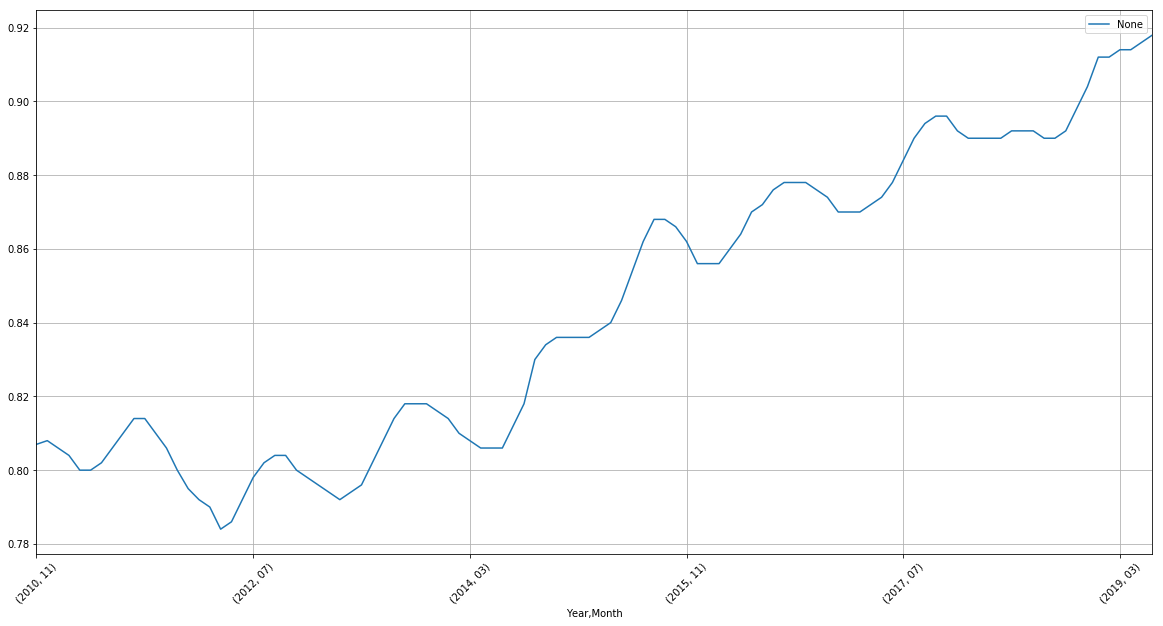

Year  State   2010          2011                                            \
Month   NaN     11     12     01     02     03     04     05     06     07   
0        NY  1.446  1.452  1.454  1.454  1.446  1.440  1.434  1.430  1.426   
1        CA  1.584  1.582  1.580  1.578  1.578  1.580  1.584  1.588  1.594   
2        TX  0.792  0.782  0.780  0.780  0.786  0.788  0.790  0.792  0.792   
3        IL  1.252  1.256  1.258  1.254  1.244  1.230  1.222  1.216  1.216   
4        TX  0.696  0.698  0.700  0.698  0.696  0.694  0.692  0.692  0.692   

Year   ...   2018                 2019                                     \
Month  ...     10     11     12     01     02     03     04     05     06   
0      ...  1.864  1.884  1.912  1.934  1.938  1.938  1.936  1.924  1.912   
1      ...  2.192  2.210  2.232  2.252  2.262  2.264  2.266  2.266  2.266   
2      ...  0.992  0.998  1.004  1.010  1.012  1.014  1.014  1.012  1.012   
3      ...  1.392  1.406  1.424  1.434  1.436  1.436  1.438  1.436  1.438   
4      ...  0.854  0.862  0.870  0.878  0.880  0.880  0.882  0.884  0.888   

Year          City  
Month          NaN  
0         New York  
1      Los Angeles  
2          Houston  
3          Chicago  
4      San Antonio  

[5 rows x 106 columns]

In [118]:
rental_index_all_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()
rental_index_all_sqft.head()